In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from os import path
import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt
from tensorflow.keras import activations as activ

plt.style.use('science')

In [3]:
filename = 'dataset_show.h5'
keyname = '10simpleHam_crafted1'
filepath = path.abspath(path.join(path.dirname("createfigures.ipynb"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
import h5py
f = h5py.File(filepath, 'r')
print([key for key in f.keys()])

['10simpleHam_crafted1', '10simpleHam_crafted_avar1', '10simpleHam_crafted_bvar1', '10simpleHam_crafted_cvar1', '20simpleHam_crafted_avar21']


In [4]:
dataset = pd.read_hdf(filepath,keyname)
dataset.head()

,dt,steps,stepsCont,delay,frequency,spectralwidth,aFieldStrength,b,c,ODscaler,dim,CoupledHamiltonian,spectrum,optdensity
0,1,4096,28672,2048,190,30,0.01,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[5.05922980347625e-25, 5.078627077633378e-25, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
1,1,4096,28672,2048,190,30,0.02,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[7.3791526215685e-24, 7.417416677407065e-24, 7...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
2,1,4096,28672,2048,190,30,0.03,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[3.317803378980075e-23, 3.3377517440740595e-23...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3,1,4096,28672,2048,190,30,0.04,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[8.791874496460739e-23, 8.856183123684934e-23,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
4,1,4096,28672,2048,190,30,0.05,0.0,0.0,5.0,10,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.6679918400803812e-22, 1.684053748997481e-22...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."


In [5]:
z = dataset["aFieldStrength"]
spectras = np.array(dataset["spectrum"].tolist())[:,500:2500]
x = np.arange(0,3276)[500:2500]
y = np.linspace(0.01,1,100)
X,Y = np.meshgrid(x,y)

print(X.shape,Y.shape,spectras.shape)

(100, 2000) (100, 2000) (100, 2000)


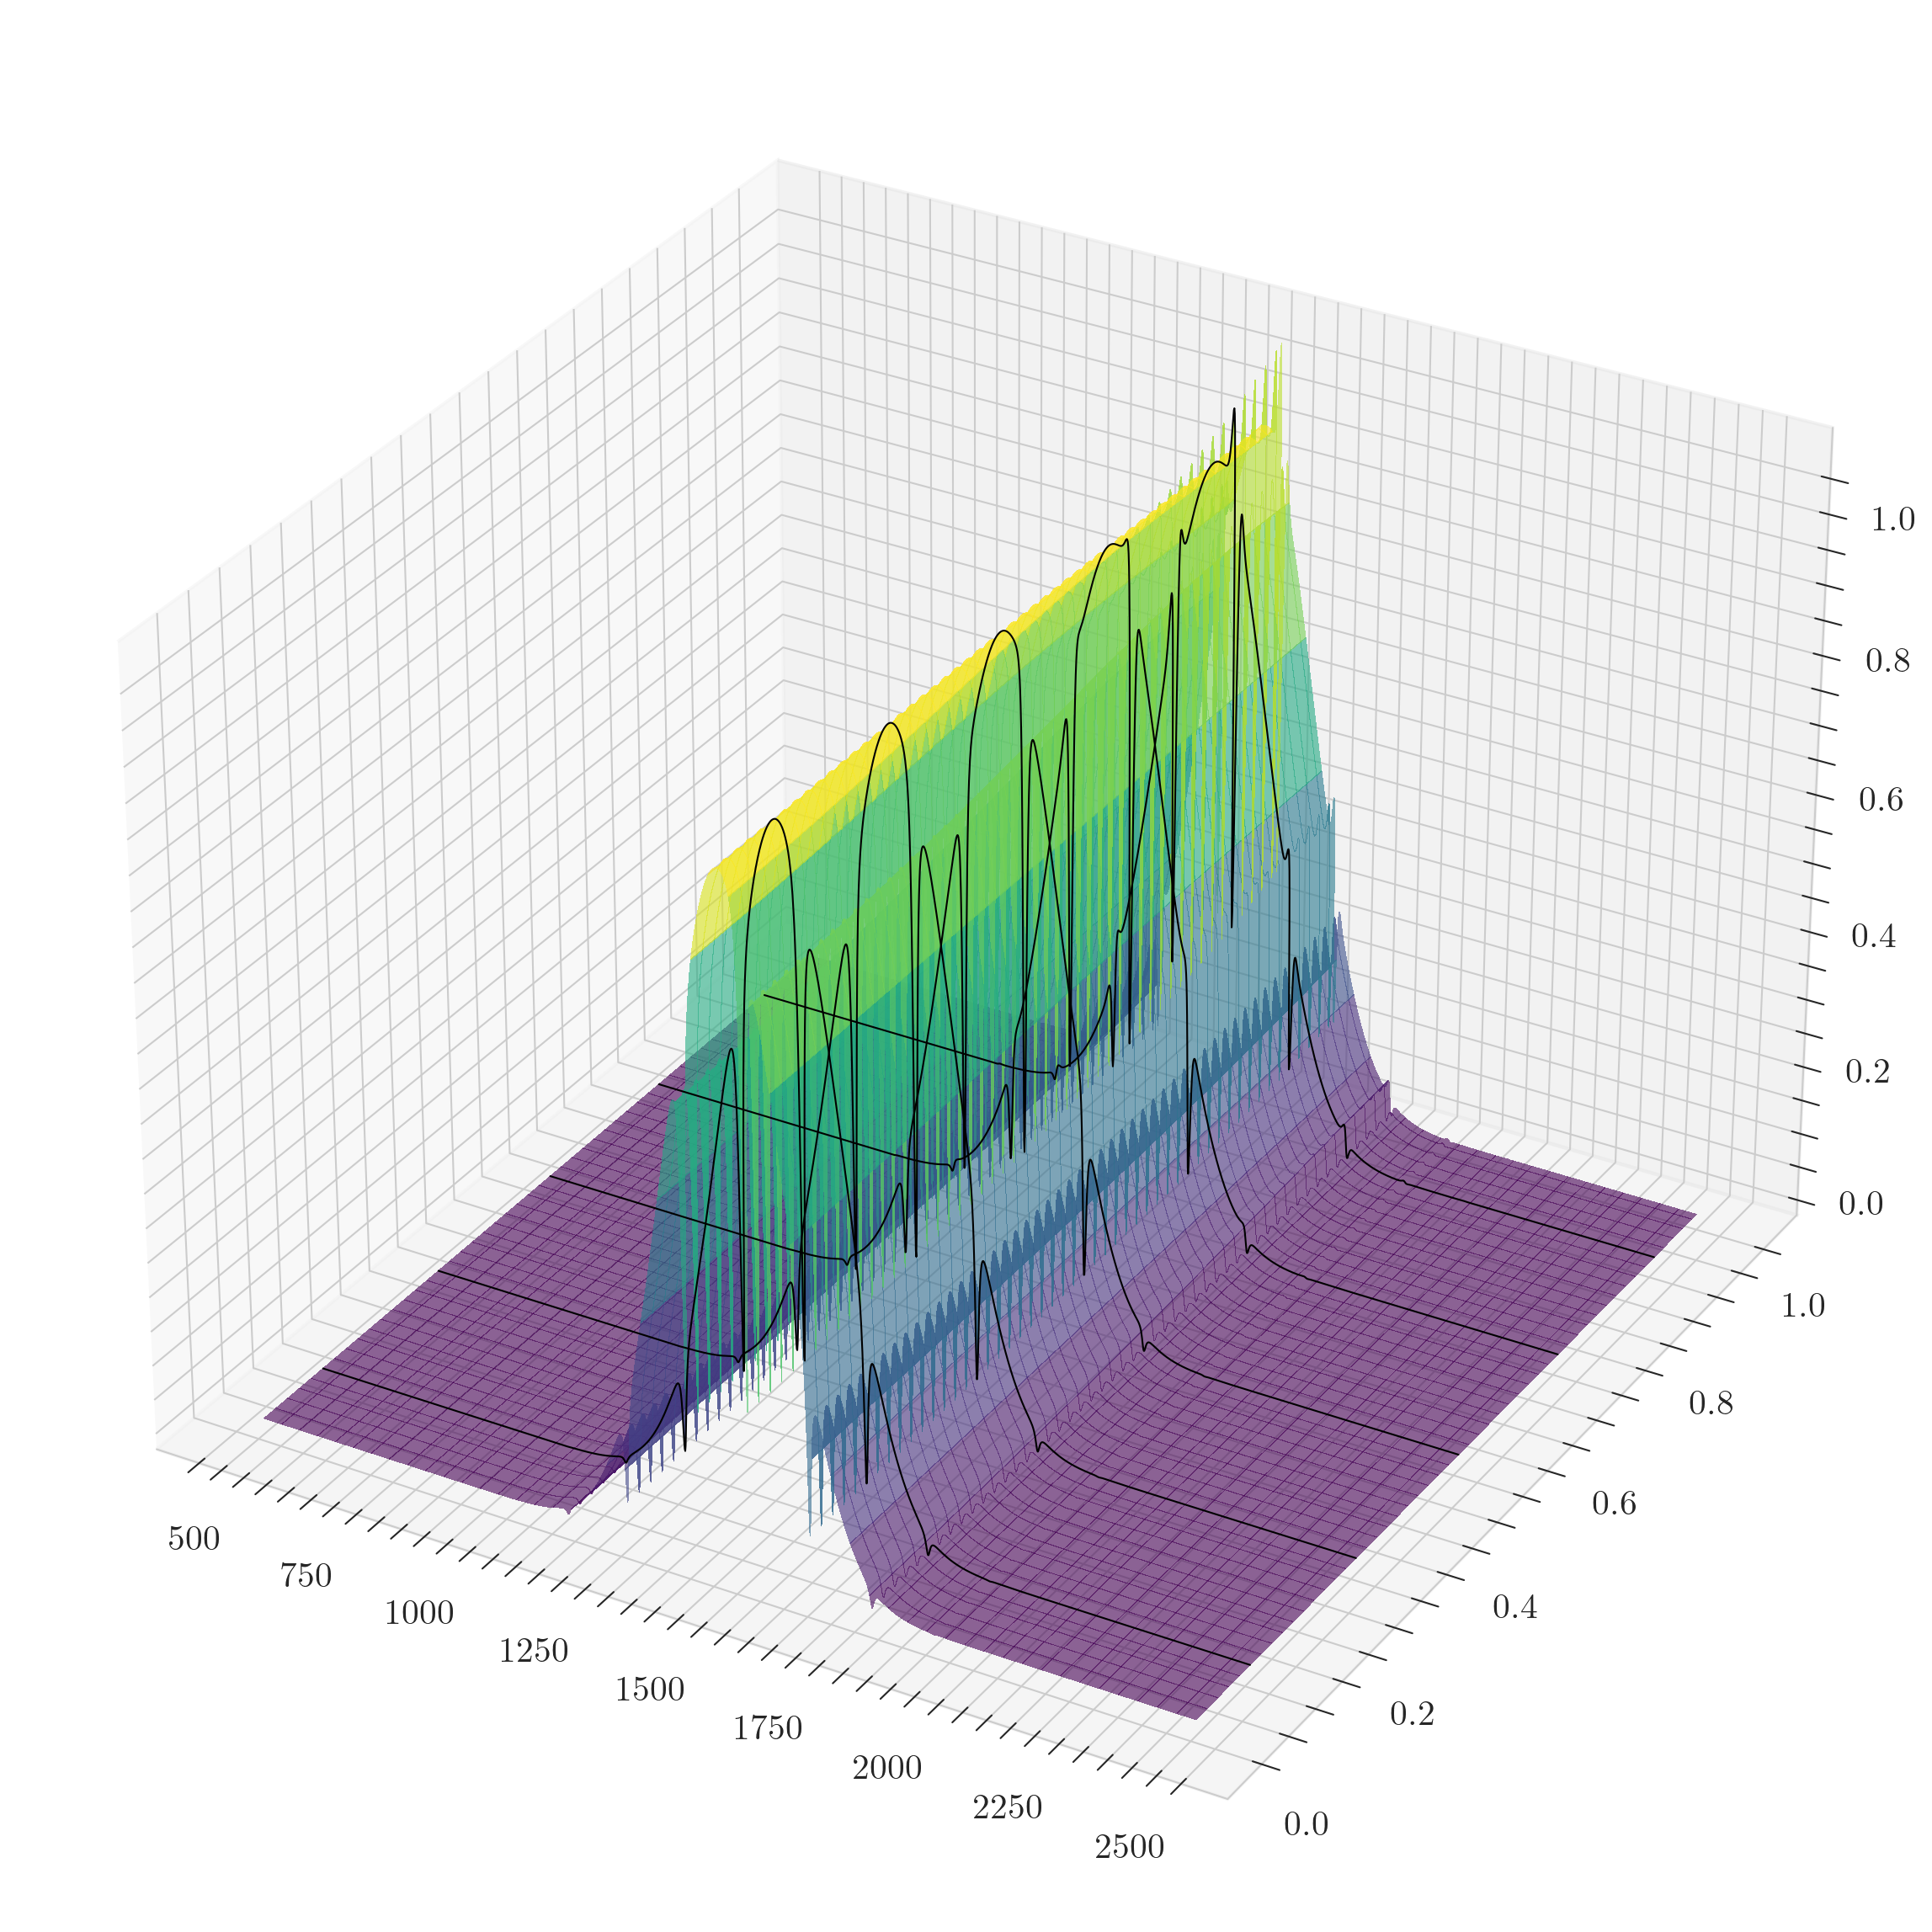

In [6]:
fig = plt.figure(figsize=(10,10),dpi = 300)
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.5,color='black')
ax.plot_surface(X,Y,spectras,linewidth = 0,cmap = 'viridis' ,alpha = 0.6,antialiased=False)

plt.show()

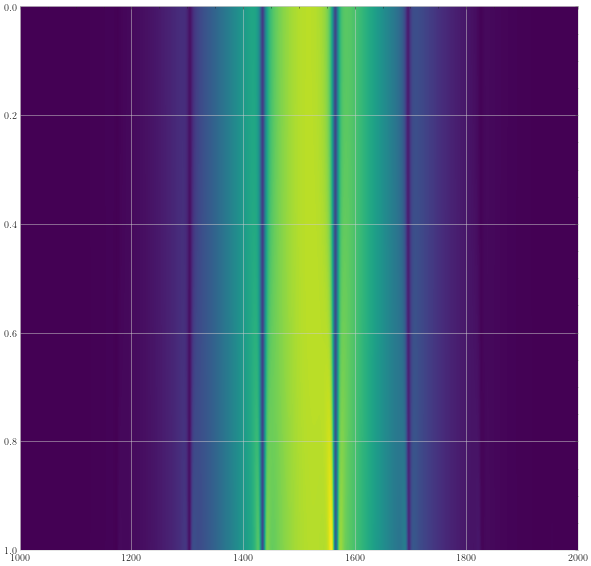

In [7]:
fig = plt.figure(figsize=(10,10))
plt.imshow(spectras[:,500:1500],cmap = 'viridis',aspect='auto',extent=[1000,2000,1,0])
#plt.xlim(0,1);plt.ylim(1000,2000);plt.show()

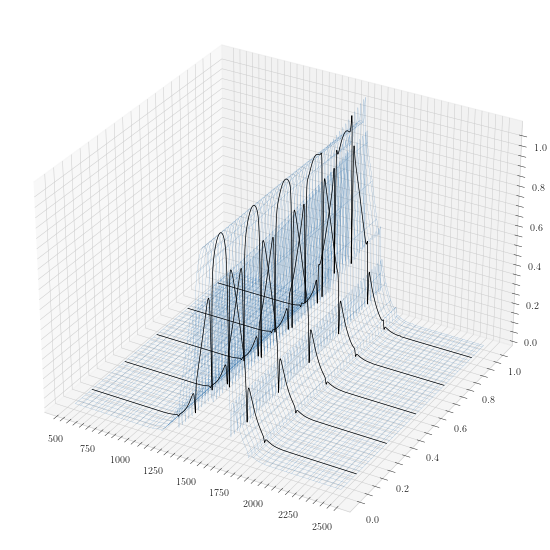

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.7,color='black')
ax.plot_wireframe(X,Y,spectras,linewidth = 0.2,cmap = 'magma' ,alpha = 0.6)

plt.show()

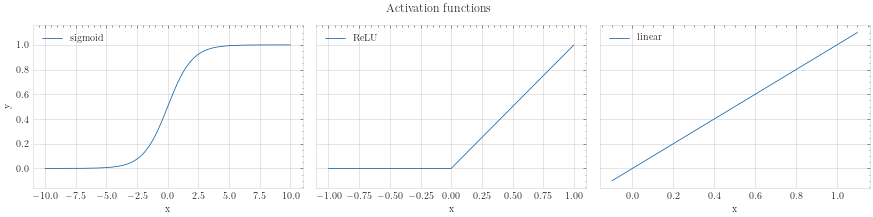

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
fig.suptitle('Activation functions')
x = np.linspace(-10, 10, 500)
ax1.plot(x, activ.sigmoid(x), linewidth=0.75, label='sigmoid')
x = np.linspace(-1, 1, 500)
ax2.plot(x, activ.relu(x), linewidth=0.75, label='ReLU')
x = np.linspace(-0.1, 1.1, 500)
ax3.plot(x, activ.linear(x), linewidth=0.75, label='linear')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax3.set_xlabel('x')
ax1.set_ylabel('y')

fig.savefig('images/activationfunctions.png', dpi=300)

Text(0, 0.5, 'y')

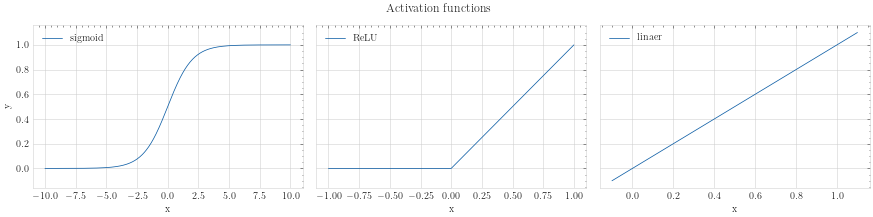

In [10]:
dt = 1
steps=4096 # number of time steps
stepsCont=2**15-steps # for adding more steps and evolve quickly after pulse is over
SpectraNumber=1 # number of spectra to calculate

# some conversions, currently not used
times=np.linspace(0,(steps+stepsCont)*dt*0.02419,steps+stepsCont,endpoint=False)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
fig.suptitle('Activation functions')
x = np.linspace(-10, 10, 500)
ax1.plot(x, activ.sigmoid(x), linewidth=0.75, label='sigmoid')
x = np.linspace(-1, 1, 500)
ax2.plot(x, activ.relu(x), linewidth=0.75, label='ReLU')
x = np.linspace(-0.1, 1.1, 500)
ax3.plot(x, activ.linear(x), linewidth=0.75, label='linear')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax3.set_xlabel('x')
ax1.set_ylabel('y')



In [11]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.dirname("createfigures.ipynb"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
import h5py
f = h5py.File(filepath, 'r')
print([key for key in f.keys()])
dataset = pd.read_hdf(filepath,key=keyname)
print(dataset.keys())

['20simpleHam_noise']
Index(['dt', 'steps', 'stepsCont', 'delay', 'frequency', 'spectralwidth',
       'aFieldStrength', 'b', 'c', 'ODscaler', 'dim', 'CoupledHamiltonian',
       'spectrum', 'optdensity', 'noise_spectrum_01', 'noise_spectrum_03',
       'noise_spectrum_05'],
      dtype='object')


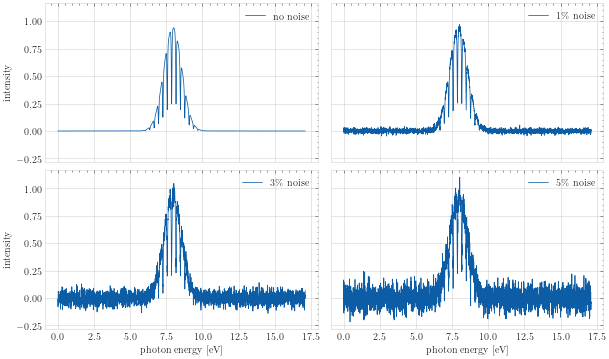

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')
times=np.linspace(0,(steps+stepsCont)*dt*0.02419,steps+stepsCont,endpoint=False)
de=1/((steps+stepsCont)*dt)*171.2
eV=np.linspace(0,(steps+stepsCont)*de,steps+stepsCont,endpoint=False)
x = eV[0:3276]
n = 1
ax1.plot(x, dataset['spectrum'][n], linewidth=0.75, label='no noise')
ax2.plot(x, dataset['noise_spectrum_01'][n], linewidth=0.75, label='1\% noise')
ax3.plot(x, dataset['noise_spectrum_03'][n], linewidth=0.75, label='3\% noise')
ax4.plot(x, dataset['noise_spectrum_05'][n], linewidth=0.75, label='5\% noise')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

#ax1.set_xlabel('time')
#ax2.set_xlabel('time')
ax3.set_xlabel('photon energy [eV]')
ax4.set_xlabel('photon energy [eV]')
ax1.set_ylabel('intensity')
#ax2.set_ylabel('intensity')
ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/noise_show.png', dpi=300)

In [13]:
print(dataset['aFieldStrength'][n],dataset['b'][n],dataset['c'][n])

0.28309566340738546 -0.009475086052346503 1.5688843181827927e-05
